## CSE583: Drug-Disease Prediction and its Feature Selection

## Importing library and packages 


In [1]:
import pandas as pd
import numpy as np
import pylab as P
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import random
import timeit
import itertools

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import grid_search
from sklearn.datasets import make_classification

random_state = np.random.RandomState(0)
%matplotlib inline



C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Reading the drug repositiong dataset

In [2]:
trainData = pd.read_excel("rand_combine_disease-drug_trainData1000.xlsx")
print(trainData.head)
trainData.info()

<bound method NDFrame.head of                                           Disease-Drug  sub2  sub3  sub4  \
0    acute lymphoblastic leukemia (all) (precursor ...     1     1     0   
1    acute lymphoblastic leukemia (all) (precursor ...     1     1     0   
2    acute lymphoblastic leukemia (all) (precursor ...     1     1     0   
3                acute myeloid leukemia (aml)-imatinib     1     1     0   
4                acute myeloid leukemia (aml)-imatinib     1     1     0   
5          chronic myeloid leukemia (cml)-methotrexate     1     1     0   
6        chronic myeloid leukemia (cml)-mercaptopurine     0     0     0   
7           chronic myeloid leukemia (cml)-hydroxyurea     0     0     0   
8             chronic myeloid leukemia (cml)-dasatinib     1     1     0   
9              chronic myeloid leukemia (cml)-imatinib     1     1     0   
10     chronic lymphocytic leukemia (cll)-methotrexate     1     1     0   
11       chronic lymphocytic leukemia (cll)-prednisone    

In [3]:
trainData[:]

,Disease-Drug,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
0,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,acute myeloid leukemia (aml)-imatinib,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,acute myeloid leukemia (aml)-imatinib,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
5,chronic myeloid leukemia (cml)-methotrexate,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,chronic myeloid leukemia (cml)-mercaptopurine,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,chronic myeloid leukemia (cml)-hydroxyurea,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,chronic myeloid leukemia (cml)-dasatinib,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,chronic myeloid leukemia (cml)-imatinib,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
len(trainData)

1000

In [5]:
len(trainData.columns)


1648

In [6]:
trainData.describe()

,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,sub16,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,0.983000,0.851000,0.476000,0.998000,0.998000,0.974000,0.851000,0.394000,0.833000,0.447000,...,0.047000,0.047000,0.047000,0.003000,0.031000,0.031000,0.031000,0.0,0.079000,0.381000
std,0.129336,0.356267,0.499674,0.044699,0.044699,0.159215,0.356267,0.488879,0.373162,0.497432,...,0.211745,0.211745,0.211745,0.054717,0.173404,0.173404,0.173404,0.0,0.269874,0.485876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Identifying features

In [7]:
# Finding features (columns in the dataset)
feat = trainData.columns
#feat = trainData.iloc[0, : ]
feat

Index(['Disease-Drug', 'sub2', 'sub3', 'sub4', 'sub10', 'sub11', 'sub12',
       'sub13', 'sub14', 'sub15',
       ...
       'hsa-mir-7-1', 'hsa-mir-7-2', 'hsa-mir-7-3', 'hsa-mir-765',
       'hsa-mir-9-1', 'hsa-mir-9-2', 'hsa-mir-9-3', 'hsa-mir-92a-1',
       'hsa-mir-96', 'Class'],
      dtype='object', length=1648)

In [8]:
# select only drug-disease name
drugDiseaseNames = trainData.iloc[:, 0:1]
drugDiseaseNames

,Disease-Drug
0,acute lymphoblastic leukemia (all) (precursor ...
1,acute lymphoblastic leukemia (all) (precursor ...
2,acute lymphoblastic leukemia (all) (precursor ...
3,acute myeloid leukemia (aml)-imatinib
4,acute myeloid leukemia (aml)-imatinib
5,chronic myeloid leukemia (cml)-methotrexate
6,chronic myeloid leukemia (cml)-mercaptopurine
7,chronic myeloid leukemia (cml)-hydroxyurea
8,chronic myeloid leukemia (cml)-dasatinib
9,chronic myeloid leukemia (cml)-imatinib


In [9]:
# select only columns with chemical substructure similarity between drugs information
chemicalSubstructure = trainData.iloc[:, 1:491]
chemicalSubstructure

,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,sub16,...,sub825,sub827,sub831,sub834,sub835,sub840,sub841,sub861,sub862,sub867
0,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,1,1,0
2,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# select only columns with side effect information
sideEffects = trainData.iloc[:, 491:1307]
sideEffects

,abdominal.cramps,abdominal.distention,abdominal.pain,malformations,abscess,acidosis,acquired.immunodeficiency.syndrome,acute.pancreatitis,adenocarcinoma,adenomas,...,bleeding.diathesis,breast.neoplasm,thrombophlebitis.superficial,drug.dependence,prostatic.hypertrophy,allergic.reaction,dysphonia,eosinophilic.pneumonia,retinal.vein.thrombosis,renal.insufficiency
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# select only columns with drug target features for drugs classification information
drugTarget = trainData.iloc[:, 1307:1449]
drugTarget

,abcc8,abl1,abl2,ache,adora1,adora2a,adora2b,adra1a,adra1b,adra1d,...,tubb,tubb1,tubb2a,tubb2b,tubb3,tubb4a,tubb4b,tubb6,tubb7p,tubb8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# select only columns with genes as a feature for diseases information
geneInfo = trainData.iloc[:, 1449:1511]
geneInfo

,tyms,yes1,app,ar.y,bax,bcl2.y,bmi1,brca2,cacna1c.y,ccnd1.y,...,slitrk1,smad4,smo.y,spi1,stat1,stat3,tgfbr2.y,tnf.y,vegfa.y,vhl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# select only columns with miRNAs information
miRNAInfo = trainData.iloc[:, 1511:1647]
miRNAInfo

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# calculate the mean value for each table with particular type of features
featMean = pd.DataFrame([chemicalSubstructure.unstack().mean(), sideEffects.unstack().mean(), drugTarget.unstack().mean(), 
          geneInfo.unstack().mean(), miRNAInfo.unstack().mean()], index = ['Chemical Structure Mean', 'Side Effect Mean'
                                                                          , 'Drug Target Sharing Mean', 
                                                                            'Gene Sharing Mean', 'miRNA Mean'])
featMean.index.name = 'Features'

featMean

,0
Features,
Chemical Structure Mean,0.319308
Side Effect Mean,0.139238
Drug Target Sharing Mean,0.030746
Gene Sharing Mean,0.021823
miRNA Mean,0.039346


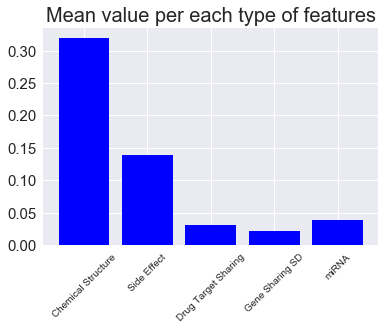

In [15]:
# plot mean value per type
plt.figure(figsize=(15,10))
plt.figure()
featMean.style.set_caption('Top 10 Fields of Research by Aggregated Funding Amount')
plt.title("Mean value per each type of features", size = 20)
plt.bar(range(5), featMean.values, color="b",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA', 
                           'Gene Sharing Mean', 'miRNA Mean'], rotation = 45, size = 10)
plt.yticks(size = 15)
plt.savefig('Mean_value_per_type_of_features.jpg', bbox_inches='tight')
plt.show()




In [16]:
# calculate the Standard Deviation value for each table with particular type of features
featStandardDeviation = pd.DataFrame([chemicalSubstructure.unstack().std(), sideEffects.unstack().std(), drugTarget.unstack().std(), 
          geneInfo.unstack().std(), miRNAInfo.unstack().std()], index = ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'])
featStandardDeviation.index.name = 'Features'
featStandardDeviation

,0
Features,
Chemical Structure,0.466209
Side Effect,0.346195
Drug Target Sharing,0.172631
Gene Sharing SD,0.146105
miRNA,0.194417


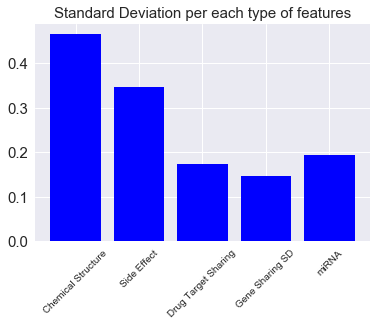

In [17]:
# plot the Standart Deviation for each type of features
plt.figure(figsize=(15,10))
plt.figure()
plt.title("Standard Deviation per each type of features", size = 15)
plt.bar(range(5), featStandardDeviation.values, color="b",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'], rotation = 45, size = 10)
plt.yticks(size = 15)
plt.savefig('SD_value_per_type_of_features.jpg', bbox_inches='tight')
plt.show()

## Features dimensionality reduction (to 200, 100 and to 20 features features) using RFE

In [18]:
# 70:30 split
#X, XTest, y, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# 60:40 split
#X, XTest, y, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# build the table with only features
size = len(trainData.columns)-1
size
X = trainData.iloc[:,1:size].values
X[:5]

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]], dtype=int64)

In [21]:
# get the target
y = trainData.iloc[:,(size):size+2].values
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

### Case1: 200 features

In [22]:
# create a base classifier used to evaluate a subset of attributes

start = timeit.default_timer()

# Applying model for RFE
model = LogisticRegression()

# create the RFE model and select 200 attributes
rfe = RFE(model, 200)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

stop = timeit.default_timer()

print('Time: ', stop - start)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ...,  True False False]
[ 142  140 1253 ...,    1 1385  778]
Time:  377.3770125


In [23]:
# Append the extracted features to feat200 array
featColumn = trainData.columns[1:size]
FT = rfe.support_
feat200 = []

for i in range(len(FT)):
    if FT[i] == True:
        feat200.append(featColumn[i])
    
feat200[:5]

['sub34', 'sub40', 'sub187', 'sub194', 'sub200']

In [24]:
# Show the length of column with 200 features
len(feat200)

200

In [25]:
# Creating an array to store the extracted features
extractFeat200 = trainData[feat200].values
extractFeat200[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [26]:
# Mergin the features with column names to export to a CSV file
extractFeatCSV200 = trainData[['Disease-Drug'] + feat200 + ['Class']]
extractFeatCSV200.to_csv('TrainData_RFE_200.csv', index = False)
extractFeatCSV200[:5]

,Disease-Drug,sub34,sub40,sub187,sub194,sub200,sub201,sub294,sub337,sub354,...,hsa-mir-488,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-520b,hsa-mir-590,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,acute myeloid leukemia (aml)-imatinib,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,acute myeloid leukemia (aml)-imatinib,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
#Calculating the percetage of each feature
feat200Dict = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    feat200Dict[name] =[]
feat200Dict

{'Chemical Structure': [],
 'Drug Target Sharing': [],
 'Gene Sharing SD': [],
 'Side Effect': [],
 'miRNA': []}

In [28]:
#Merging extracted features
for i in range(len(feat200)):
    if feat200[i] in chemicalSubstructure.columns:
        feat200Dict['Chemical Structure'] = feat200Dict['Chemical Structure'] + [feat200[i]]
    elif feat200[i] in sideEffects.columns:
        feat200Dict['Side Effect'] = feat200Dict['Side Effect'] + [feat200[i]]
    elif feat200[i] in drugTarget.columns:
        feat200Dict['Drug Target Sharing'] = feat200Dict['Drug Target Sharing'] + [feat200[i]]
    elif feat200[i] in geneInfo.columns:
        feat200Dict['Gene Sharing SD'] = feat200Dict['Gene Sharing SD'] + [feat200[i]]
    elif feat200[i] in miRNAInfo.columns:
        feat200Dict['miRNA'] = feat200Dict['miRNA'] + [feat200[i]]

In [29]:
# Calculating percentage for each feature
percent200 = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    percent200[name] = len(feat200Dict[name])
percent200


{'Chemical Structure': 43,
 'Drug Target Sharing': 17,
 'Gene Sharing SD': 31,
 'Side Effect': 42,
 'miRNA': 67}

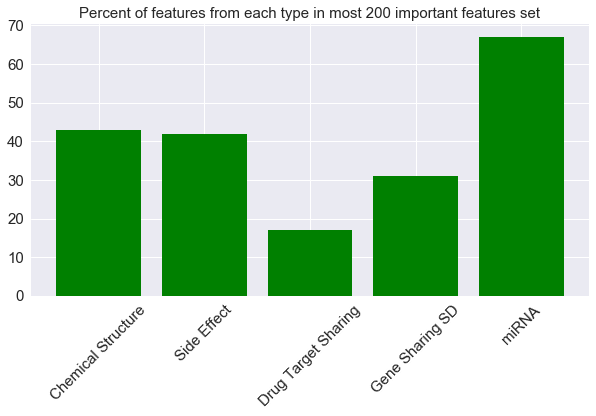

In [30]:
# Plotting the percentage found for each feature
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 200 important features set", size = 15)
plt.bar(range(5), percent200.values(), color="g",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('RFE_percent200.jpg', bbox_inches='tight')
plt.show()

### Case 2: 100 features

In [31]:
# create a base classifier used to evaluate a subset of attributes

start = timeit.default_timer()

# Applying model for RFE
model = LogisticRegression()

# create the RFE model and select 100 attributes
rfe = RFE(model,100)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

stop = timeit.default_timer()

print('Time: ', stop - start)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ..., False False False]
[ 242  240 1353 ...,  101 1485  878]
Time:  362.4309083


In [32]:
# Append the extracted features to feat100 array
featColumn = trainData.columns[1:size]
FT = rfe.support_
feat100 = []

for i in range(len(FT)):
    if FT[i] == True:
        feat100.append(featColumn[i])
    
feat100[:5]

['sub200', 'sub422', 'sub439', 'sub440', 'sub455']

In [33]:
# Show the length of column with 100 features
len(feat100)

100

In [34]:
# Creating an array to store the extracted features
extractFeat100 = trainData[feat100].values
extractFeat100[:5]

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [35]:
# Mergin the features with column names to export to a CSV file
extractFeatCSV100 = trainData[['Disease-Drug'] + feat100 + ['Class']]
extractFeatCSV100.to_csv('TrainData_RFE_100.csv', index = False)
extractFeatCSV100[:5]

,Disease-Drug,sub200,sub422,sub439,sub440,sub455,sub515,sub547,sub559,sub572,...,hsa-mir-320a,hsa-mir-335,hsa-mir-34b,hsa-mir-34c,hsa-mir-429,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-590,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,acute myeloid leukemia (aml)-imatinib,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,acute myeloid leukemia (aml)-imatinib,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#Calculating the percetage of each feature
feat100Dict = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    feat100Dict[name] =[]
feat100Dict

{'Chemical Structure': [],
 'Drug Target Sharing': [],
 'Gene Sharing SD': [],
 'Side Effect': [],
 'miRNA': []}

In [37]:
#Merging extracted features
for i in range(len(feat100)):
    if feat100[i] in chemicalSubstructure.columns:
        feat100Dict['Chemical Structure'] = feat100Dict['Chemical Structure'] + [feat100[i]]
    elif feat100[i] in sideEffects.columns:
        feat100Dict['Side Effect'] = feat100Dict['Side Effect'] + [feat100[i]]
    elif feat100[i] in drugTarget.columns:
        feat100Dict['Drug Target Sharing'] = feat100Dict['Drug Target Sharing'] + [feat100[i]]
    elif feat100[i] in geneInfo.columns:
        feat100Dict['Gene Sharing SD'] = feat100Dict['Gene Sharing SD'] + [feat100[i]]
    elif feat100[i] in miRNAInfo.columns:
        feat100Dict['miRNA'] = feat100Dict['miRNA'] + [feat100[i]]


In [38]:
# Calculating percentage for each feature
percent100 = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    percent100[name] = len(feat100Dict[name])
percent100

{'Chemical Structure': 11,
 'Drug Target Sharing': 10,
 'Gene Sharing SD': 24,
 'Side Effect': 14,
 'miRNA': 41}

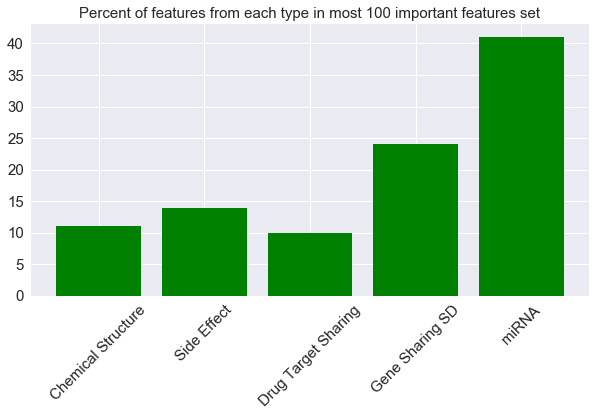

In [39]:
# Plotting the percentage found for each feature
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 100 important features set", size = 15)
plt.bar(range(5), percent100.values(), color="g",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('RFE_percent100.jpg', bbox_inches='tight')
plt.show()


### Case3: 20 features

In [40]:
# create a base classifier used to evaluate a subset of attributes

start = timeit.default_timer()

# Applying model for RFE
model = LogisticRegression()

# create the RFE model and select 20 attributes
rfe = RFE(model,20)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

stop = timeit.default_timer()

print('Time: ', stop - start)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ..., False False False]
[ 322  320 1433 ...,  181 1565  958]
Time:  358.5296479


In [41]:
# Append the extracted features to feat20 array
featColumn = trainData.columns[1:size]
FT = rfe.support_
feat20 = []

for i in range(len(FT)):
    if FT[i] == True:
        feat20.append(featColumn[i])
    
feat20[:5]

['sub422', 'ESR.increased', 'grin2a', 'kcnmb4', 'kcnn3']

In [42]:
# Show the length of column with 20 features
len(feat20)

20

In [43]:
# Creating an array to store the extracted features
extractFeat20 = trainData[feat20].values
extractFeat20[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [44]:
# Mergin the features with column names to export to a CSV file
extractFeatCSV20 = trainData[['Disease-Drug'] + feat20 + ['Class']]
extractFeatCSV20.to_csv('TrainData_RFE_20.csv', index = False)
extractFeatCSV20[:5]

,Disease-Drug,sub422,ESR.increased,grin2a,kcnmb4,kcnn3,nos2,gstp1.y,lrrk2,met.y,...,pten,hsa-mir-155,hsa-mir-15a,hsa-mir-17,hsa-mir-195,hsa-mir-29b-1,hsa-mir-29b-2,hsa-mir-34b,hsa-mir-513a-1,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,acute myeloid leukemia (aml)-imatinib,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,acute myeloid leukemia (aml)-imatinib,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
#Calculating the percetage of each feature
feat20Dict = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    feat20Dict[name] =[]
feat20Dict

{'Chemical Structure': [],
 'Drug Target Sharing': [],
 'Gene Sharing SD': [],
 'Side Effect': [],
 'miRNA': []}

In [46]:
#Merging extracted features
for i in range(len(feat20)):
    if feat20[i] in chemicalSubstructure.columns:
        feat20Dict['Chemical Structure'] = feat20Dict['Chemical Structure'] + [feat20[i]]
    elif feat20[i] in sideEffects.columns:
        feat20Dict['Side Effect'] = feat20Dict['Side Effect'] + [feat20[i]]
    elif feat20[i] in drugTarget.columns:
        feat20Dict['Drug Target Sharing'] = feat20Dict['Drug Target Sharing'] + [feat20[i]]
    elif feat20[i] in geneInfo.columns:
        feat20Dict['Gene Sharing SD'] = feat20Dict['Gene Sharing SD'] + [feat20[i]]
    elif feat20[i] in miRNAInfo.columns:
        feat20Dict['miRNA'] = feat20Dict['miRNA'] + [feat20[i]]

In [47]:
# Calculating percentage for each feature
percent20 = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    percent20[name] = len(feat20Dict[name])
percent20

{'Chemical Structure': 1,
 'Drug Target Sharing': 4,
 'Gene Sharing SD': 6,
 'Side Effect': 1,
 'miRNA': 8}

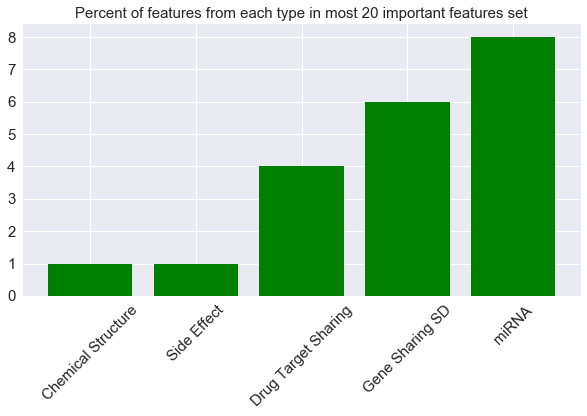

In [48]:
# Plotting the percentage found for each feature
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 20 important features set", size = 15)
plt.bar(range(5), percent20.values(), color="g",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('RFE_percent20.jpg', bbox_inches='tight')
plt.show()

### Case4: 3 features

In [49]:
# create a base classifier used to evaluate a subset of attributes

start = timeit.default_timer()

# Applying model for RFE
model = LogisticRegression()

# create the RFE model and select 20 attributes
rfe = RFE(model,3)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

stop = timeit.default_timer()

print('Time: ', stop - start)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ..., False False False]
[ 339  337 1450 ...,  198 1582  975]
Time:  361.19987790000005


In [50]:
# Append the extracted features to feat3 array
featColumn = trainData.columns[1:size]
FT = rfe.support_
feat3 = []

for i in range(len(FT)):
    if FT[i] == True:
        feat3.append(featColumn[i])
    
feat3[:5]

['ESR.increased', 'lrrk2', 'hsa-mir-29b-2']

In [51]:
# Show the length of column with 3 features
len(feat3)

3

In [52]:
# Creating an array to store the extracted features
extractFeat3 = trainData[feat3].values
extractFeat3[:5]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [53]:
# Mergin the features with column names to export to a CSV file
extractFeatCSV3 = trainData[['Disease-Drug'] + feat3 + ['Class']]
extractFeatCSV3.to_csv('TrainData_RFE_3.csv', index = False)
extractFeatCSV3[:5]

,Disease-Drug,ESR.increased,lrrk2,hsa-mir-29b-2,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,1
3,acute myeloid leukemia (aml)-imatinib,0,0,0,1
4,acute myeloid leukemia (aml)-imatinib,0,0,0,1


In [54]:
#Calculating the percetage of each feature
feat3Dict = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    feat3Dict[name] =[]
feat3Dict

{'Chemical Structure': [],
 'Drug Target Sharing': [],
 'Gene Sharing SD': [],
 'Side Effect': [],
 'miRNA': []}

In [55]:
#Merging extracted features
for i in range(len(feat3)):
    if feat3[i] in chemicalSubstructure.columns:
        feat3Dict['Chemical Structure'] = feat3Dict['Chemical Structure'] + [feat3[i]]
    elif feat3[i] in sideEffects.columns:
        feat3Dict['Side Effect'] = feat3Dict['Side Effect'] + [feat3[i]]
    elif feat3[i] in drugTarget.columns:
        feat3Dict['Drug Target Sharing'] = feat3Dict['Drug Target Sharing'] + [feat3[i]]
    elif feat3[i] in geneInfo.columns:
        feat3Dict['Gene Sharing SD'] = feat3Dict['Gene Sharing SD'] + [feat3[i]]
    elif feat3[i] in miRNAInfo.columns:
        feat3Dict['miRNA'] = feat3Dict['miRNA'] + [feat3[i]]

In [56]:
# Calculating percentage for each feature
percent3 = dict()
for name in ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA']:
    percent3[name] = len(feat3Dict[name])
percent3

{'Chemical Structure': 0,
 'Drug Target Sharing': 0,
 'Gene Sharing SD': 1,
 'Side Effect': 1,
 'miRNA': 1}

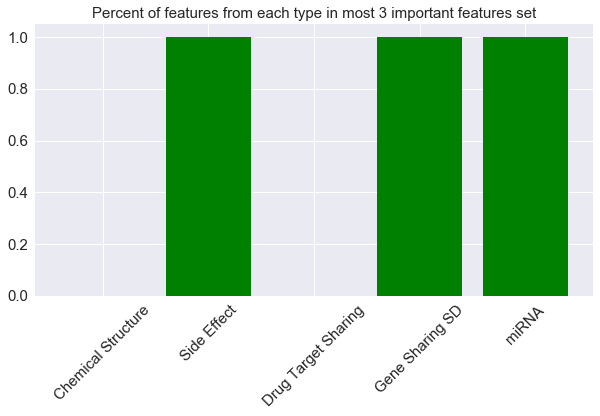

In [57]:
# Plotting the percentage found for each feature
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 3 important features set", size = 15)
plt.bar(range(5), percent3.values(), color="g",align="center")
plt.xticks(range(5),  ['Chemical Structure', 'Side Effect'
                            , 'Drug Target Sharing', 
                           'Gene Sharing SD', 'miRNA'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('RFE_percent3.jpg', bbox_inches='tight')
plt.show()

## Features dimensionality reduction (to 200, 100 and to 20 features features) using PCA

### Case1: 200 features

In [191]:
# use PCA algorithm for features selection
numFeat = 200
pca200 = PCA(numFeat)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca200.fit(X)

featPCA200 = pca200.transform(X)
featPCA200[:5]


array([[  6.69e+00,  -1.66e+00,   9.36e+00,   1.90e-01,  -4.02e+00,
         -1.77e+00,   3.81e-01,  -4.16e-02,  -7.47e-01,  -9.73e-01,
          7.75e-01,   6.20e-02,  -2.05e-01,  -2.14e-01,   4.02e-01,
         -2.24e-01,  -2.46e-02,  -6.07e-02,   3.71e-01,   4.31e-01,
         -1.08e-01,   5.82e-01,  -7.38e-02,  -5.90e-01,  -3.55e-01,
          1.81e-01,   4.51e-02,  -1.83e-02,  -1.51e-01,   2.34e-01,
          2.49e-02,  -2.12e-01,   2.97e-01,   1.45e-01,  -1.71e-01,
         -3.21e-02,  -4.47e-01,  -4.20e-01,  -1.59e+00,   2.49e-01,
          5.73e-01,  -2.24e-01,  -1.05e+00,   4.91e-01,  -6.70e-01,
         -4.58e-01,  -9.62e-02,   3.09e-01,  -1.63e-01,   2.78e-01,
          3.98e-02,  -2.44e-01,  -1.78e-01,  -2.20e-01,  -2.24e-02,
         -3.32e-01,   2.31e-01,  -1.91e-02,   3.64e-01,   2.42e-02,
         -1.07e-01,  -1.85e-01,  -1.66e-01,   1.20e-01,  -7.52e-02,
          1.03e-01,  -2.59e-01,  -2.05e-01,   1.57e-01,  -3.94e-02,
         -1.58e-02,   2.97e-01,  -1.79e-01,  -3.

In [192]:
#Merge features to extract in CSV format
extractPCACSV200 = trainData[['Disease-Drug']]
dfPCA = pd.DataFrame(featPCA200)
extractPCACSV200 = pd.merge(extractPCACSV200, dfPCA, left_index = True, right_index=True)
extractPCACSV200.loc[:, 'Class'] = trainData.loc[:, 'Class']
extractPCACSV200.to_csv('TrainData_PCA_200.csv', index = False)
extractPCACSV200[:5]

,Disease-Drug,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,Class
0,acute lymphoblastic leukemia (all) (precursor ...,6.693368,-1.658225,9.362689,0.190428,-4.016489,-1.765267,0.381426,-0.041606,-0.747267,...,6.117069e-16,1.140581e-16,5.646525e-16,7.511353e-16,-3.055282e-16,7.589415e-17,-4.850178e-16,3.546425e-16,6.646159e-17,1
1,acute lymphoblastic leukemia (all) (precursor ...,2.295896,0.810448,-6.167722,-2.030408,-4.156993,0.223584,5.124359,-1.778741,-3.750664,...,-2.582570e-16,1.973248e-16,-4.067927e-16,-3.209238e-16,3.675445e-16,-1.218643e-16,8.223673e-17,-3.479205e-16,-2.249720e-16,1
2,acute lymphoblastic leukemia (all) (precursor ...,4.662952,0.021688,4.578135,-1.424623,1.357322,0.205435,-1.470713,0.142984,-0.007939,...,1.077697e-16,2.272488e-16,-3.469447e-18,2.220446e-16,6.754580e-16,-2.753874e-16,-5.076777e-16,-1.078781e-16,-5.957691e-16,1
3,acute myeloid leukemia (aml)-imatinib,4.658048,0.006389,4.569564,-1.406955,1.371682,0.206565,-1.464812,0.166243,0.026837,...,1.155760e-16,2.298509e-16,-3.469447e-18,2.207436e-16,6.719885e-16,-2.753874e-16,-5.202002e-16,-1.214306e-16,-5.927875e-16,1
4,acute myeloid leukemia (aml)-imatinib,4.670829,0.027438,4.557820,-1.466503,1.402681,0.308281,-1.214811,0.293733,0.336807,...,1.136244e-16,2.285498e-16,2.775558e-17,2.255141e-16,6.748074e-16,-2.914335e-16,-4.961309e-16,-1.127570e-16,-5.950102e-16,1


### Case2: 100 features

In [60]:
# use PCA algorithm for features selection
numFeat = 100
pca100 = PCA(numFeat)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca100.fit(X)

featPCA100 = pca100.transform(X)
featPCA100


array([[  6.69336830e+00,  -1.65822460e+00,   9.36268899e+00, ...,
         -9.73711527e-02,   8.54643128e-02,  -2.27895405e-01],
       [  2.29589644e+00,   8.10448213e-01,  -6.16772248e+00, ...,
         -7.05099055e-02,   1.95808287e-01,  -3.06355544e-01],
       [  4.66295247e+00,   2.16881605e-02,   4.57813451e+00, ...,
          1.28117184e-01,  -6.89393725e-02,   1.99503460e-01],
       ..., 
       [  2.69680471e+00,   1.67176253e+00,  -1.53496751e-01, ...,
          3.84254390e-02,  -3.16730334e-02,  -2.19321725e-02],
       [  2.95048571e+00,  -6.56216816e-02,   5.63673716e-01, ...,
         -5.00193538e-03,  -5.96305037e-03,   1.36422362e-03],
       [ -6.89831193e+00,   1.17009139e+01,   3.65564037e+00, ...,
         -1.84884089e-02,   2.96709346e-02,   3.15368833e-03]])

In [61]:
#Merge features to extract in CSV format
extractPCACSV100 = trainData[['Disease-Drug']]
dfPCA = pd.DataFrame(featPCA100)
extractPCACSV100  = pd.merge(extractPCACSV100, dfPCA, left_index = True, right_index=True)
extractPCACSV100 .loc[:, 'Class'] = trainData.loc[:, 'Class']
extractPCACSV100 .to_csv('TrainData_PCA_100.csv', index = False)
extractPCACSV100 [:5]

,Disease-Drug,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Class
0,acute lymphoblastic leukemia (all) (precursor ...,6.693368,-1.658225,9.362689,0.190428,-4.016489,-1.765267,0.381426,-0.041606,-0.747267,...,0.075230,0.055863,0.218866,-0.057265,0.041551,-0.057529,-0.097371,0.085464,-0.227895,1
1,acute lymphoblastic leukemia (all) (precursor ...,2.295896,0.810448,-6.167722,-2.030408,-4.156993,0.223584,5.124359,-1.778741,-3.750664,...,0.129748,0.036355,0.225806,-0.019807,0.058991,-0.006386,-0.070510,0.195808,-0.306356,1
2,acute lymphoblastic leukemia (all) (precursor ...,4.662952,0.021688,4.578135,-1.424623,1.357322,0.205435,-1.470713,0.142984,-0.007939,...,-0.084440,-0.058815,-0.209215,0.052409,-0.063199,0.045219,0.128117,-0.068939,0.199503,1
3,acute myeloid leukemia (aml)-imatinib,4.658048,0.006389,4.569564,-1.406955,1.371682,0.206565,-1.464812,0.166243,0.026837,...,0.030477,0.068172,0.195884,-0.016032,0.065315,0.073535,-0.106096,0.084482,-0.156201,1
4,acute myeloid leukemia (aml)-imatinib,4.670829,0.027438,4.557820,-1.466503,1.402681,0.308281,-1.214811,0.293733,0.336807,...,0.107321,0.169098,0.141969,-0.127321,0.072988,-0.024546,-0.166800,0.129059,-0.217818,1


### Case3: 20 features

In [62]:
# use PCA algorithm for features selection
numFeat = 20
pca20 = PCA(numFeat)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca20.fit(X)

featPCA20 = pca20.transform(X)
featPCA20

array([[  6.6933683 ,  -1.6582246 ,   9.36268899, ...,  -0.06041096,
          0.3707169 ,   0.43055154],
       [  2.29589644,   0.81044821,  -6.16772248, ...,   0.06609855,
          0.02302813,  -0.69986579],
       [  4.66295247,   0.02168816,   4.57813451, ...,   0.24862645,
         -1.87511894,   0.66611799],
       ..., 
       [  2.69680471,   1.67176253,  -0.15349675, ...,   2.54425688,
         -4.75354662,  -2.08467992],
       [  2.95048571,  -0.06562168,   0.56367372, ...,   0.52142249,
          2.03346233,   0.82261128],
       [ -6.89831193,  11.70091388,   3.65564037, ...,  -0.21715605,
         -0.32335243,  -0.12352033]])

In [63]:
#Merge features to extract in CSV format
extractPCACSV20 = trainData[['Disease-Drug']]
dfPCA = pd.DataFrame(featPCA20)
extractPCACSV20  = pd.merge(extractPCACSV20, dfPCA, left_index = True, right_index=True)
extractPCACSV20 .loc[:, 'Class'] = trainData.loc[:, 'Class']
extractPCACSV20 .to_csv('TrainData_PCA_20.csv', index = False)
extractPCACSV20 [:5]

,Disease-Drug,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,Class
0,acute lymphoblastic leukemia (all) (precursor ...,6.693368,-1.658225,9.362689,0.190428,-4.016489,-1.765267,0.381426,-0.041606,-0.747267,...,0.062026,-0.205029,-0.214034,0.401628,-0.224151,-0.024604,-0.060411,0.370717,0.430552,1
1,acute lymphoblastic leukemia (all) (precursor ...,2.295896,0.810448,-6.167722,-2.030408,-4.156993,0.223584,5.124359,-1.778741,-3.750665,...,-0.843946,-0.372521,-0.678208,-0.714779,0.460755,0.132152,0.066099,0.023028,-0.699866,1
2,acute lymphoblastic leukemia (all) (precursor ...,4.662952,0.021688,4.578135,-1.424623,1.357322,0.205435,-1.470713,0.142984,-0.007939,...,-2.234399,2.740069,-0.429708,-2.411176,3.230875,-0.521651,0.248626,-1.875119,0.666118,1
3,acute myeloid leukemia (aml)-imatinib,4.658048,0.006389,4.569564,-1.406955,1.371682,0.206565,-1.464812,0.166243,0.026837,...,-2.251593,2.757582,-0.364009,-2.423098,3.213549,-0.546246,0.310477,-1.813622,0.655972,1
4,acute myeloid leukemia (aml)-imatinib,4.670829,0.027438,4.557820,-1.466503,1.402681,0.308281,-1.214811,0.293733,0.336807,...,-2.493890,2.722821,-0.514039,-2.318713,3.353641,-0.385328,0.450463,-1.112816,1.242997,1



## Applying Pearson correlation coefficient

### Case1: 200 feature


In [64]:
f1Val = []
corrCoeff = []

for i in feat200:
            f1Val.append(i)
            corrCoeff.append(pearsonr(trainData[i], trainData['Class'])[0])
           
            
pearson200 = pd.DataFrame()
pearson200 ['Features'] = f1Val
pearson200 ['Pearson correlation coefficient between features and class'] = corrCoeff

pearson200  = pearson200 .sort_values(['Pearson correlation coefficient between features and class'])
pearson200 .index = range(len(pearson200 ['Features']))
pearson200  = pearson200 [:]
pearson200 

,Features,Pearson correlation coefficient between features and class
0,hsa-mir-195,-0.038520
1,met.y,-0.037954
2,hsa-mir-206,-0.035503
3,sub621,-0.034386
4,sub633,-0.034386
5,ESR.increased,-0.031158
6,ankle.edema,-0.031158
7,hsa-mir-429,-0.030740
8,sub572,-0.030630
9,hemolytic.anemia,-0.030183


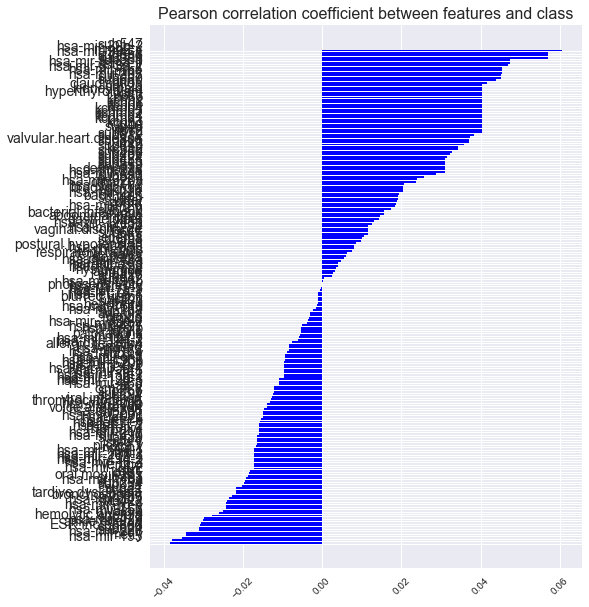

In [65]:
fig = plt.figure(figsize=(10,10))
headers = pearson200 ['Features']    
rects = plt.barh(range(len(pearson200['Pearson correlation coefficient between features and class'])),
                 pearson200['Pearson correlation coefficient between features and class'],
                 height=0.8,
                 align="edge",
                 color="blue",
                 edgecolor="none")

plt.xticks(rotation = 45)
    
plt.yticks(range(len(headers)), headers, ha='right', va='bottom', size='14')
plt.subplots_adjust(left=0.3)
plt.title('Pearson correlation coefficient between features and class', size='16')
plt.grid(True)  
plt.savefig('Pearson correlation coefficient between features_200.jpg', bbox_inches='tight')
plt.show()

### Case2: 100 features

In [66]:
f2Val = []
corrCoeff = []

for i in feat100:
            f2Val.append(i)
            corrCoeff.append(pearsonr(trainData[i], trainData['Class'])[0])
           
            
pearson100 = pd.DataFrame()
pearson100 ['Features'] = f2Val
pearson100 ['Pearson correlation coefficient between features and class'] = corrCoeff

pearson100  = pearson100 .sort_values(['Pearson correlation coefficient between features and class'])
pearson100 .index = range(len(pearson100 ['Features']))
pearson100  = pearson100 [:]
pearson100 

,Features,Pearson correlation coefficient between features and class
0,hsa-mir-195,-0.038520
1,met.y,-0.037954
2,sub633,-0.034386
3,ankle.edema,-0.031158
4,ESR.increased,-0.031158
5,hsa-mir-429,-0.030740
6,sub572,-0.030630
7,hemolytic.anemia,-0.030183
8,rb1.y,-0.026110
9,hsa-mir-16-1,-0.025094


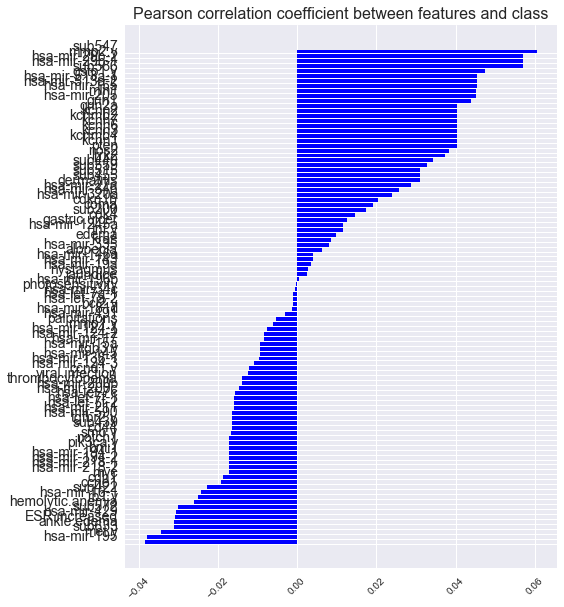

In [67]:
fig = plt.figure(figsize=(10,10))
headers = pearson100 ['Features']    
rects = plt.barh(range(len(pearson100['Pearson correlation coefficient between features and class'])),
                 pearson100['Pearson correlation coefficient between features and class'],
                 height=0.8,
                 align="edge",
                 color="blue",
                 edgecolor="none")

plt.xticks(rotation = 45)
    
plt.yticks(range(len(headers)), headers, ha='right', va='bottom', size='14')
plt.subplots_adjust(left=0.3)
plt.title('Pearson correlation coefficient between features and class', size='16')
plt.grid(True)  
plt.savefig('Pearson correlation coefficient between features_100.jpg', bbox_inches='tight')
plt.show()

### Case 3: 20 features

In [68]:
f3Val = []
corrCoeff = []

for i in feat20:
            f3Val.append(i)
            corrCoeff.append(pearsonr(trainData[i], trainData['Class'])[0])
           
            
pearson20 = pd.DataFrame()
pearson20 ['Features'] = f3Val
pearson20 ['Pearson correlation coefficient between features and class'] = corrCoeff

pearson20  = pearson20 .sort_values(['Pearson correlation coefficient between features and class'])
pearson20.index = range(len(pearson20 ['Features']))
pearson20  = pearson20 [:]
pearson20 

,Features,Pearson correlation coefficient between features and class
0,hsa-mir-195,-0.038520
1,met.y,-0.037954
2,ESR.increased,-0.031158
3,sub422,-0.024224
4,hsa-mir-15a,-0.009321
5,hsa-mir-17,-0.009282
6,hsa-mir-34b,0.024048
7,lrrk2,0.034254
8,nos2,0.037212
9,pten,0.038292


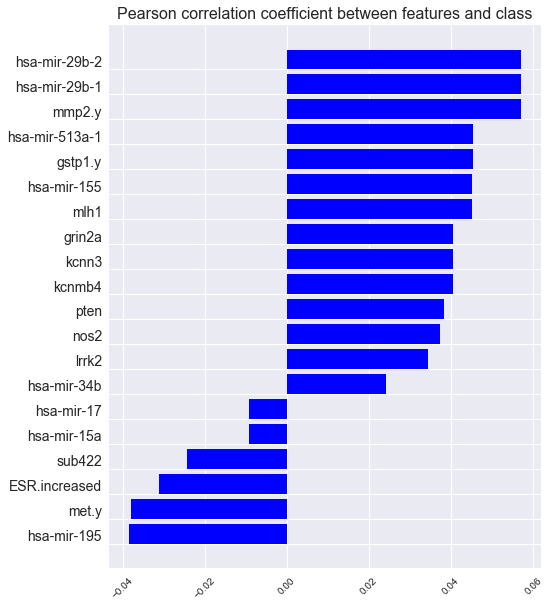

In [69]:
fig = plt.figure(figsize=(10,10))
headers = pearson20 ['Features']    
rects = plt.barh(range(len(pearson20['Pearson correlation coefficient between features and class'])),
                 pearson20['Pearson correlation coefficient between features and class'],
                 height=0.8,
                 align="edge",
                 color="blue",
                 edgecolor="none")

plt.xticks(rotation = 45)
    
plt.yticks(range(len(headers)), headers, ha='right', va='bottom', size='14')
plt.subplots_adjust(left=0.3)
plt.title('Pearson correlation coefficient between features and class', size='16')
plt.grid(True)  
plt.savefig('Pearson correlation coefficient between features_20.jpg', bbox_inches='tight')
plt.show()

## Loading Test data  (80-20 split)

In [70]:
# Dataset "combine_disease-drug_testdata.xlsx" is already spplit to 80:20
testData = pd.read_excel("combine_disease-drug_testdata.xlsx")
testData[:5]

,Disease-Drug,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
0,gallbladder cancer-doxorubicin,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,kaposi's sarcoma-doxorubicin,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
2,gastric cancer-porfimer sodium,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,allograft rejection-prednisone,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,asthma-zafirlukast,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [71]:
colTest = testData.columns
colTestFeat = colTest[1 : len(colTest) - 1]
XTest = testData[colTestFeat].values
XTest[:5]


array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [72]:
yTest = testData['Class'].values
yTest[:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Uncomment for 70:30 data split

In [73]:
#XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

### Uncomment for 60:40 data split

In [74]:
#XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.4, random_state=0)

## SVM Model
### Linear SVC 
### Setting baseline model 

In [75]:
for c in range(1,20):
    predTrial = OneVsRestClassifier(LinearSVC(penalty='l2', loss='hinge', 
                                          dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                          intercept_scaling=2, class_weight=None, verbose=0, 
                                          random_state=0, max_iter=1000)).fit(X, y).predict(XTest)
    print ("Test set accuracy:", np.mean(predTrial == yTest))

Test set accuracy: 0.065
Test set accuracy: 0.08
Test set accuracy: 0.19
Test set accuracy: 0.655
Test set accuracy: 0.05
Test set accuracy: 0.22
Test set accuracy: 0.015
Test set accuracy: 0.345
Test set accuracy: 0.035
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.97
Test set accuracy: 0.975
Test set accuracy: 0.955
Test set accuracy: 0.955
Test set accuracy: 0.95


### Support Vector Machines model evaluation

Confusion matrix, without normalization
[[  0   0]
 [ 10 190]]


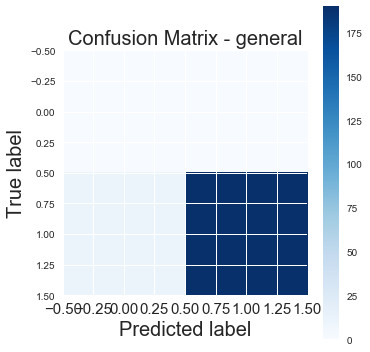

In [76]:
def plot_confusion_matrix(cm, title='Confusion Matrix - general', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    plt.colorbar()
    tick_marks = np.arange(len(predTrial))
    plt.xticks(size = 15)
    plt.xticks(size = 15)
    plt.tight_layout()
    plt.ylabel('True label', size = 20)
    plt.xlabel('Predicted label', size = 20)

cm = confusion_matrix(yTest, predTrial)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_1647_features.jpg', bbox_inches='tight')

In [77]:
def s_s(cm):
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]

    try:
        sensitivity = float(TP)/float(TP + FN)
    except:
        sensitivity = 0.0
    sensitivity

    try:
        specificity = float(TN)/float(TN + FP)
    except:
        specificity = 0.0
    specificity

    try:
        precision = float(TP)/float(TP + FP)
    except:
        precision = 0.0
    precision
    
    return sensitivity, specificity, precision


sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.95, 0.0)

### Applying SVM to Case 1 (200 features) from Recursive Feature Elimination 

In [189]:
# Get case 1 important columns from test data

XTestRFE200 = testData[feat200].values
XTestRFE200[:5]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [190]:

for c in range(1,70, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelRFE200 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(extractFeat200, y)
        predRFE200 = modelRFE200.predict(XTestRFE200)
        print ("Test set accuracy:", np.mean(predRFE200 == yTest))

hinge 1
Test set accuracy: 0.055
squared_hinge 1
Test set accuracy: 0.2
hinge 11
Test set accuracy: 0.08
squared_hinge 11
Test set accuracy: 0.325
hinge 21
Test set accuracy: 0.07
squared_hinge 21
Test set accuracy: 0.455
hinge 31
Test set accuracy: 0.16
squared_hinge 31
Test set accuracy: 0.51
hinge 41
Test set accuracy: 0.505
squared_hinge 41
Test set accuracy: 0.545
hinge 51
Test set accuracy: 0.275
squared_hinge 51
Test set accuracy: 0.56
hinge 61
Test set accuracy: 0.365
squared_hinge 61
Test set accuracy: 0.565


In [183]:
dfRFE200 = testData[['Disease-Drug'] + feat200 + ['Class']]
dfRFE200.loc[:, 'Predicted_Class'] = predRFE200
dfRFE200.to_csv('Test_data_from_RFE_200.csv', index = False)
dfRFE200[:5]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,sub34,sub40,sub187,sub194,sub200,sub201,sub294,sub337,sub354,...,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-520b,hsa-mir-590,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,Class,Predicted_Class
0,gallbladder cancer-doxorubicin,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,kaposi's sarcoma-doxorubicin,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,gastric cancer-porfimer sodium,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,allograft rejection-prednisone,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,asthma-zafirlukast,1,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


Confusion matrix
[[  0   0]
 [ 87 113]]


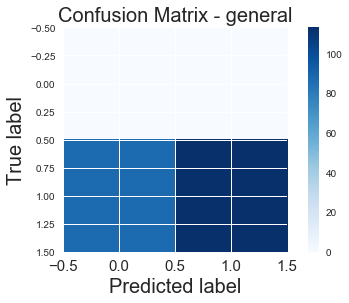

In [184]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predRFE200)
np.set_printoptions(precision = 2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_200_features_from_Features_Elimination.jpg', bbox_inches='tight')


In [186]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.565, 0.0)

In [187]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE200)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'green')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


TypeError: 'numpy.float64' object is not callable

In [188]:
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE200
result[:10]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,1
1,kaposi's sarcoma-doxorubicin,1,1
2,gastric cancer-porfimer sodium,1,0
3,allograft rejection-prednisone,1,0
4,asthma-zafirlukast,1,1
5,gastric cancer-docetaxel,1,0
6,neuroblastoma-doxorubicin,1,1
7,allograft rejection-methylprednisolone,1,1
8,choriocarcinoma-methotrexate,1,0
9,endometrial cancer-paclitaxel,1,1


In [85]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,1


In [86]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0
57,gastric cancer-paclitaxel,1,0
67,gastric cancer-paclitaxel,1,0
89,gastric cancer-paclitaxel,1,0
126,gastric cancer-paclitaxel,1,0
171,gastric cancer-paclitaxel,1,0


### Applying SVM to Case 2 (100 features) from Recursive Feature Elimination 

In [87]:
# Get case 2 important columns from test data

XTestRFE100 = testData[feat100].values
XTestRFE100[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [88]:
for c in range(1,70, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelRFE100 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(extractFeat100, y)
        predRFE100 = modelRFE100.predict(XTestRFE100)
        print ("Test set accuracy:", np.mean(predRFE100 == yTest))

hinge 1
Test set accuracy: 0.02
squared_hinge 1
Test set accuracy: 0.2
hinge 11
Test set accuracy: 0.02
squared_hinge 11
Test set accuracy: 0.125
hinge 21
Test set accuracy: 0.02
squared_hinge 21
Test set accuracy: 0.72
hinge 31
Test set accuracy: 0.02
squared_hinge 31
Test set accuracy: 0.925
hinge 41
Test set accuracy: 0.065
squared_hinge 41
Test set accuracy: 0.975
hinge 51
Test set accuracy: 0.11
squared_hinge 51
Test set accuracy: 0.975
hinge 61
Test set accuracy: 0.14
squared_hinge 61
Test set accuracy: 0.985


In [89]:
dfRFE100 = testData[['Disease-Drug'] + feat100 + ['Class']]
dfRFE100.loc[:, 'Predicted_Class'] = predRFE100
dfRFE100.to_csv('Test_data_from_RFE_100.csv', index = False)
dfRFE100[:5]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,sub200,sub422,sub439,sub440,sub455,sub515,sub547,sub559,sub572,...,hsa-mir-335,hsa-mir-34b,hsa-mir-34c,hsa-mir-429,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-590,Class,Predicted_Class
0,gallbladder cancer-doxorubicin,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,kaposi's sarcoma-doxorubicin,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,gastric cancer-porfimer sodium,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
3,allograft rejection-prednisone,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,asthma-zafirlukast,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


Confusion matrix
[[  0   0]
 [  3 197]]


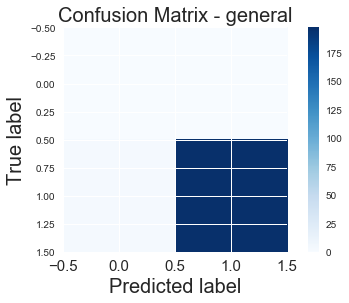

In [90]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predRFE100)
np.set_printoptions(precision = 2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_100_features_from_Features_Elimination.jpg', bbox_inches='tight')


In [91]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.985, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

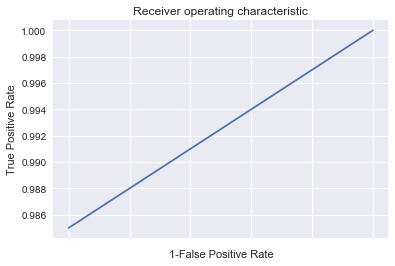

In [92]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE100)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'green')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [93]:
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE100
result[:10]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,1
1,kaposi's sarcoma-doxorubicin,1,1
2,gastric cancer-porfimer sodium,1,1
3,allograft rejection-prednisone,1,1
4,asthma-zafirlukast,1,1
5,gastric cancer-docetaxel,1,1
6,neuroblastoma-doxorubicin,1,1
7,allograft rejection-methylprednisolone,1,1
8,choriocarcinoma-methotrexate,1,1
9,endometrial cancer-paclitaxel,1,1


In [94]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,1


In [95]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,1
57,gastric cancer-paclitaxel,1,1
67,gastric cancer-paclitaxel,1,1
89,gastric cancer-paclitaxel,1,1
126,gastric cancer-paclitaxel,1,1
171,gastric cancer-paclitaxel,1,1


### Applying SVM to Case 3 (20 features) from Recursive Feature Elimination

In [96]:
# Get case 3 important columns from test data

XTestRFE20 = testData[feat20].values
XTestRFE20[:5]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [97]:
for c in range(1,70, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelRFE20 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(extractFeat20, y)
        predRFE20 = modelRFE20.predict(XTestRFE20)
        print ("Test set accuracy:", np.mean(predRFE20 == yTest))

hinge 1
Test set accuracy: 0.015
squared_hinge 1
Test set accuracy: 0.05
hinge 11
Test set accuracy: 0.02
squared_hinge 11
Test set accuracy: 0.05
hinge 21
Test set accuracy: 0.02
squared_hinge 21
Test set accuracy: 0.05
hinge 31
Test set accuracy: 0.02
squared_hinge 31
Test set accuracy: 0.05
hinge 41
Test set accuracy: 0.02
squared_hinge 41
Test set accuracy: 0.05
hinge 51
Test set accuracy: 0.02
squared_hinge 51
Test set accuracy: 0.14
hinge 61
Test set accuracy: 0.02
squared_hinge 61
Test set accuracy: 0.17


In [98]:
dfRFE20 = testData[['Disease-Drug'] + feat20 + ['Class']]
dfRFE20.loc[:, 'Predicted_Class'] = predRFE20
dfRFE20.to_csv('Test_data_from_RFE_20.csv', index = False)
dfRFE20[:5]


C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,sub422,ESR.increased,grin2a,kcnmb4,kcnn3,nos2,gstp1.y,lrrk2,met.y,...,hsa-mir-155,hsa-mir-15a,hsa-mir-17,hsa-mir-195,hsa-mir-29b-1,hsa-mir-29b-2,hsa-mir-34b,hsa-mir-513a-1,Class,Predicted_Class
0,gallbladder cancer-doxorubicin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,kaposi's sarcoma-doxorubicin,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
2,gastric cancer-porfimer sodium,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,allograft rejection-prednisone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,asthma-zafirlukast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Confusion matrix
[[  0   0]
 [166  34]]


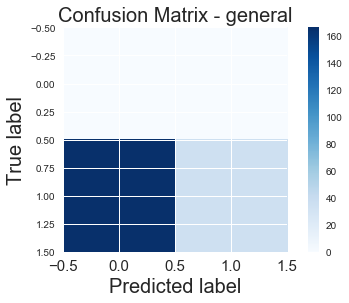

In [99]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predRFE20)
np.set_printoptions(precision = 2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_20_features_from_Features_Elimination.jpg', bbox_inches='tight')


In [100]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision


(0.0, 0.17, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

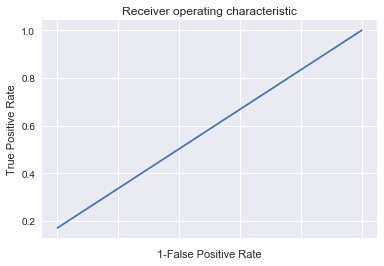

In [101]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE20)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [102]:
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE20
result[:10]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,0
1,kaposi's sarcoma-doxorubicin,1,0
2,gastric cancer-porfimer sodium,1,0
3,allograft rejection-prednisone,1,0
4,asthma-zafirlukast,1,0
5,gastric cancer-docetaxel,1,0
6,neuroblastoma-doxorubicin,1,0
7,allograft rejection-methylprednisolone,1,0
8,choriocarcinoma-methotrexate,1,0
9,endometrial cancer-paclitaxel,1,1


In [103]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]


,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0


In [104]:

Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0
57,gastric cancer-paclitaxel,1,0
67,gastric cancer-paclitaxel,1,0
89,gastric cancer-paclitaxel,1,0
126,gastric cancer-paclitaxel,1,0
171,gastric cancer-paclitaxel,1,0


### Applying SVM to Case 1 (200 features) from PCA

In [105]:
XTestPCA200 = pca200.transform(XTest)
XTestPCA200[:5]

array([[ -6.91e+00,   1.17e+01,   3.61e+00,   1.40e+00,  -3.35e-01,
          8.89e-01,   1.13e+00,  -1.45e+00,   1.01e+00,  -6.43e-01,
         -4.24e-01,   6.08e-02,   5.24e-01,  -2.40e-01,   6.62e-02,
          2.43e-01,   3.72e-01,   5.90e-02,   5.72e-01,   4.94e-01,
          2.77e-01,   1.17e+00,  -2.32e-02,  -6.30e-02,  -7.06e-01,
          9.15e-01,  -1.03e-01,  -4.48e-01,  -5.92e-01,   1.11e+00,
          1.37e+00,  -1.27e+00,  -2.24e-01,   9.50e-01,   1.93e-01,
         -2.33e-01,  -6.60e-04,   3.64e-01,   4.81e-01,   3.71e-01,
         -3.02e-01,   2.42e-02,   4.36e-01,   9.37e-02,   2.68e-02,
          2.05e-01,  -1.81e-01,   1.32e-01,  -2.07e-02,   1.09e-01,
         -6.69e-03,  -9.49e-02,   3.19e-02,  -2.20e-01,  -3.47e-02,
         -8.13e-02,   5.61e-02,  -8.82e-02,  -9.72e-02,   1.25e-01,
         -2.03e-01,  -8.85e-02,  -1.93e-02,   7.70e-02,  -2.32e-02,
          2.26e-02,   7.54e-02,  -3.49e-02,   3.92e-03,   4.87e-04,
          5.39e-02,  -7.12e-02,   1.47e-01,  -5.

In [106]:
for c in range(1,60, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelPCA200 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(featPCA200, y)
        predPCA200 = modelPCA200.predict(XTestPCA200)
        print ("Test set accuracy:", np.mean(predPCA200 == yTest))

hinge 1
Test set accuracy: 0.065
squared_hinge 1
Test set accuracy: 0.215
hinge 11
Test set accuracy: 0.285
squared_hinge 11
Test set accuracy: 0.325
hinge 21
Test set accuracy: 0.495
squared_hinge 21
Test set accuracy: 0.325
hinge 31
Test set accuracy: 0.495
squared_hinge 31
Test set accuracy: 0.33
hinge 41
Test set accuracy: 0.495
squared_hinge 41
Test set accuracy: 0.33
hinge 51
Test set accuracy: 0.495
squared_hinge 51
Test set accuracy: 0.33


Confusion matrix
[[  0   0]
 [134  66]]


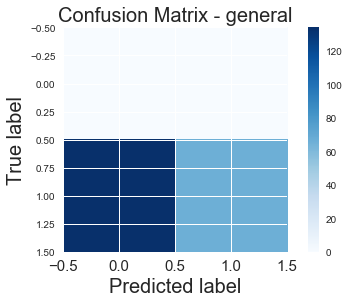

In [107]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predPCA200)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_200_features_from_PCA.jpg', bbox_inches='tight')

In [108]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


[]

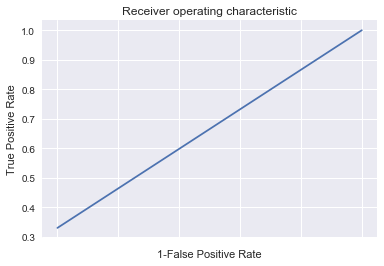

In [109]:

# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA200)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [110]:
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predPCA200
result[:10]


C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,0
1,kaposi's sarcoma-doxorubicin,1,0
2,gastric cancer-porfimer sodium,1,0
3,allograft rejection-prednisone,1,0
4,asthma-zafirlukast,1,0
5,gastric cancer-docetaxel,1,1
6,neuroblastoma-doxorubicin,1,0
7,allograft rejection-methylprednisolone,1,0
8,choriocarcinoma-methotrexate,1,0
9,endometrial cancer-paclitaxel,1,1


In [111]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]


,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0


In [112]:

Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,1
57,gastric cancer-paclitaxel,1,1
67,gastric cancer-paclitaxel,1,1
89,gastric cancer-paclitaxel,1,1
126,gastric cancer-paclitaxel,1,1
171,gastric cancer-paclitaxel,1,1



### Applying SVM to Case 2 (100 features) from PCA

In [113]:
XTestPCA100 = pca100.transform(XTest)
XTestPCA100[:5]

array([[ -6.91e+00,   1.17e+01,   3.61e+00,   1.40e+00,  -3.35e-01,
          8.89e-01,   1.13e+00,  -1.45e+00,   1.01e+00,  -6.43e-01,
         -4.24e-01,   6.08e-02,   5.24e-01,  -2.40e-01,   6.62e-02,
          2.43e-01,   3.72e-01,   5.90e-02,   5.72e-01,   4.94e-01,
          2.77e-01,   1.17e+00,  -2.32e-02,  -6.30e-02,  -7.06e-01,
          9.15e-01,  -1.03e-01,  -4.48e-01,  -5.92e-01,   1.11e+00,
          1.37e+00,  -1.27e+00,  -2.24e-01,   9.50e-01,   1.93e-01,
         -2.33e-01,  -6.60e-04,   3.64e-01,   4.81e-01,   3.71e-01,
         -3.02e-01,   2.42e-02,   4.36e-01,   9.37e-02,   2.68e-02,
          2.05e-01,  -1.81e-01,   1.32e-01,  -2.07e-02,   1.09e-01,
         -6.69e-03,  -9.49e-02,   3.19e-02,  -2.20e-01,  -3.47e-02,
         -8.13e-02,   5.61e-02,  -8.82e-02,  -9.72e-02,   1.25e-01,
         -2.03e-01,  -8.85e-02,  -1.93e-02,   7.70e-02,  -2.32e-02,
          2.26e-02,   7.54e-02,  -3.49e-02,   3.92e-03,   4.86e-04,
          5.39e-02,  -7.11e-02,   1.47e-01,  -5.

In [114]:
for c in range(1,60, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelPCA100 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(featPCA100, y)
        predPCA100 = modelPCA100.predict(XTestPCA100)
        print ("Test set accuracy:", np.mean(predPCA100 == yTest))

hinge 1
Test set accuracy: 0.05
squared_hinge 1
Test set accuracy: 0.15
hinge 11
Test set accuracy: 0.305
squared_hinge 11
Test set accuracy: 0.44
hinge 21
Test set accuracy: 0.445
squared_hinge 21
Test set accuracy: 0.44
hinge 31
Test set accuracy: 0.445
squared_hinge 31
Test set accuracy: 0.44
hinge 41
Test set accuracy: 0.445
squared_hinge 41
Test set accuracy: 0.44
hinge 51
Test set accuracy: 0.445
squared_hinge 51
Test set accuracy: 0.44


Confusion matrix
[[  0   0]
 [112  88]]


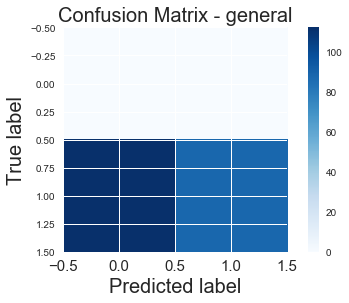

In [115]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predPCA100)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_100_features_from_PCA.jpg', bbox_inches='tight')

In [116]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision


(0.0, 0.44, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

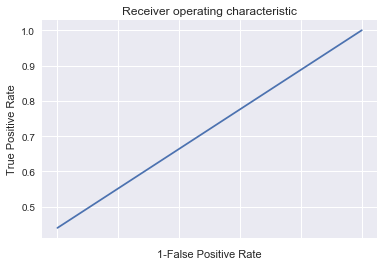

In [117]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA100)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [118]:
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predPCA100
result[:10]


C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,1
1,kaposi's sarcoma-doxorubicin,1,1
2,gastric cancer-porfimer sodium,1,1
3,allograft rejection-prednisone,1,0
4,asthma-zafirlukast,1,1
5,gastric cancer-docetaxel,1,1
6,neuroblastoma-doxorubicin,1,1
7,allograft rejection-methylprednisolone,1,0
8,choriocarcinoma-methotrexate,1,1
9,endometrial cancer-paclitaxel,1,0


In [119]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]


,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0


In [120]:

Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0
57,gastric cancer-paclitaxel,1,0
67,gastric cancer-paclitaxel,1,0
89,gastric cancer-paclitaxel,1,0
126,gastric cancer-paclitaxel,1,0
171,gastric cancer-paclitaxel,1,0



### Applying SVM to Case 3 (20 features) from PCA

In [121]:
XTestPCA20 = pca20.transform(XTest)
XTestPCA20[:5]

array([[ -6.91,  11.72,   3.61,   1.4 ,  -0.33,   0.89,   1.13,  -1.45,
          1.01,  -0.64,  -0.42,   0.06,   0.52,  -0.24,   0.07,   0.24,
          0.37,   0.06,   0.57,   0.49],
       [ -6.85,  11.64,   3.75,   1.74,  -0.52,   0.63,   1.01,  -1.77,
          0.6 ,  -0.65,  -0.79,   0.34,   0.2 ,  -0.58,   0.38,  -0.45,
         -0.13,  -0.35,  -0.73,  -0.41],
       [  4.2 ,  -1.37,  -0.18,   4.96,   6.54,   1.87,   3.82,   1.82,
         -1.56,  -3.32,  -0.27,   0.58,  -0.09,  -0.55,  -0.32,  -0.17,
          0.15,  -0.02,  -0.21,   0.1 ],
       [  2.33,   0.79,  -6.23,  -2.06,  -4.1 ,   0.3 ,   5.22,  -1.7 ,
         -3.52,   1.48,   0.05,  -0.98,  -0.35,  -0.23,  -0.86,   0.32,
          0.14,   0.53,   0.71,  -0.08],
       [  3.53,  -0.89,  -0.42,   3.63,   0.82,  -0.11,  -0.65,  -1.89,
          0.3 ,   1.92,   0.51,   0.39,   1.58,   0.1 ,  -0.21,   0.93,
         -0.27,  -0.46,  -0.13,   0.06]])

In [122]:
for c in range(1,60, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        modelPCA20 = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(featPCA20, y)
        predPCA20 = modelPCA20.predict(XTestPCA20)
        print ("Test set accuracy:", np.mean(predPCA20 == yTest))

hinge 1
Test set accuracy: 0.0
squared_hinge 1
Test set accuracy: 0.015
hinge 11
Test set accuracy: 0.125
squared_hinge 11
Test set accuracy: 0.29
hinge 21
Test set accuracy: 0.295
squared_hinge 21
Test set accuracy: 0.3
hinge 31
Test set accuracy: 0.445
squared_hinge 31
Test set accuracy: 0.33
hinge 41
Test set accuracy: 0.425
squared_hinge 41
Test set accuracy: 0.33
hinge 51
Test set accuracy: 0.425
squared_hinge 51
Test set accuracy: 0.33


Confusion matrix
[[  0   0]
 [134  66]]


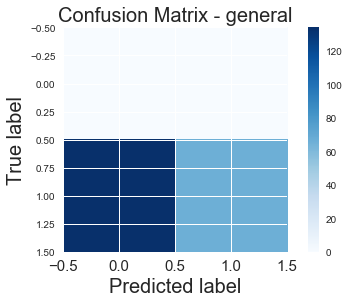

In [123]:
# Plotting confusion matrix
cm = confusion_matrix(yTest, predPCA20)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_20_features_from_PCA.jpg', bbox_inches='tight')

In [124]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

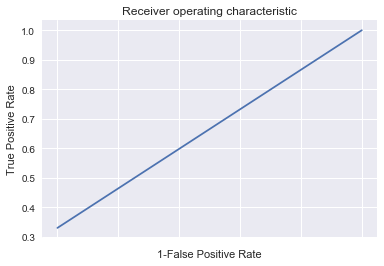

In [125]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA20)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [126]:

result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted class'] = predPCA20
result[:10]

C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,Class,Predicted class
0,gallbladder cancer-doxorubicin,1,0
1,kaposi's sarcoma-doxorubicin,1,0
2,gastric cancer-porfimer sodium,1,0
3,allograft rejection-prednisone,1,1
4,asthma-zafirlukast,1,0
5,gastric cancer-docetaxel,1,1
6,neuroblastoma-doxorubicin,1,0
7,allograft rejection-methylprednisolone,1,1
8,choriocarcinoma-methotrexate,1,0
9,endometrial cancer-paclitaxel,1,1


In [127]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted class
85,asthma-theophylline,1,0


In [128]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted class
53,gastric cancer-paclitaxel,1,1
57,gastric cancer-paclitaxel,1,1
67,gastric cancer-paclitaxel,1,1
89,gastric cancer-paclitaxel,1,1
126,gastric cancer-paclitaxel,1,1
171,gastric cancer-paclitaxel,1,1


## Logistic Regression (LR)

### Applying LR to Case 1 (200 features) from Recursive Feature Elimination

In [129]:
clf = LogisticRegression()
clf.fit(extractFeat200,y)
predRFE_LR200 = clf.predict_proba(XTestRFE200)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE_LR200
result.to_csv('Features_Eliminations_with_probabilities_LR_200.csv', index = False)
result[:10]

clf.score(extractFeat200, y)


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.64100000000000001

In [130]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Area under the ROC curve : nan


[]

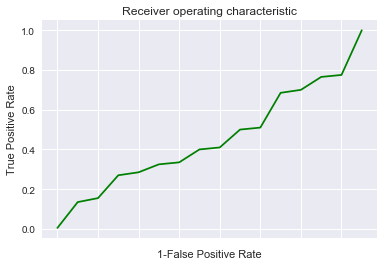

In [131]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE_LR200)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'],color = 'green')
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [132]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.520835


In [133]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.328748
57,gastric cancer-paclitaxel,1,0.301371
67,gastric cancer-paclitaxel,1,0.447829
89,gastric cancer-paclitaxel,1,0.446607
126,gastric cancer-paclitaxel,1,0.338050
171,gastric cancer-paclitaxel,1,0.465921


### Applying LR to Case 2 (100 features) from Recursive Feature Elimination

In [134]:
clf = LogisticRegression()
clf.fit(extractFeat100,y)
predRFE_LR100 = clf.predict_proba(XTestRFE100)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE_LR100
result.to_csv('Features_Eliminations_with_probabilities_LR_100.csv', index = False)
result[:10]

clf.score(extractFeat100, y)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.64200000000000002

In [135]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

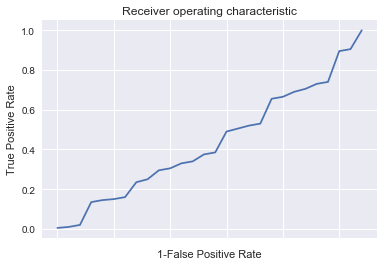

In [136]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE_LR100)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [137]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.44838


In [138]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.325445
57,gastric cancer-paclitaxel,1,0.304524
67,gastric cancer-paclitaxel,1,0.434356
89,gastric cancer-paclitaxel,1,0.419790
126,gastric cancer-paclitaxel,1,0.343741
171,gastric cancer-paclitaxel,1,0.480411


### Applying LR to Case 3 (20 features) from Recursive Feature Elimination

In [139]:
clf = LogisticRegression()
clf.fit(extractFeat20,y)
predRFE_LR20 = clf.predict_proba(XTestRFE20)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predRFE_LR20
result.to_csv('Features_Eliminations_with_probabilities_LR_20.csv', index = False)
result[:10]
clf.score(extractFeat20, y)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.63

In [140]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

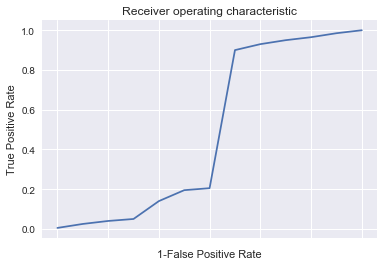

In [141]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predRFE_LR20)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [142]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.372942


In [143]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.372942
57,gastric cancer-paclitaxel,1,0.372942
67,gastric cancer-paclitaxel,1,0.372942
89,gastric cancer-paclitaxel,1,0.372942
126,gastric cancer-paclitaxel,1,0.374977
171,gastric cancer-paclitaxel,1,0.372942


### Applying LR to Case 1 (200 features) from PCA

In [144]:
clf = LogisticRegression()
clf.fit(featPCA200, y)
predPCA_LR200 = clf.predict_proba(XTestPCA200)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predPCA_LR200
result.to_csv('PCA_with_probabilities_LR_200.csv', index = False)
result[:10]
clf.score(featPCA200, y)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.64200000000000002

In [145]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Area under the ROC curve : nan


[]

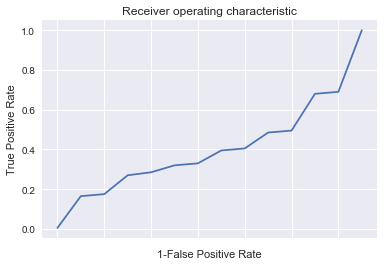

In [146]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA_LR200)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [147]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.53821


In [148]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.329364
57,gastric cancer-paclitaxel,1,0.298000
67,gastric cancer-paclitaxel,1,0.448508
89,gastric cancer-paclitaxel,1,0.442933
126,gastric cancer-paclitaxel,1,0.327508
171,gastric cancer-paclitaxel,1,0.464462


### Applying LR to Case 2 (100 features) from PCA

In [149]:
clf = LogisticRegression()
clf.fit(featPCA100, y)
predPCA_LR100 = clf.predict_proba(XTestPCA100)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predPCA_LR100
result.to_csv('PCA_with_probabilities_LR_100.csv', index = False)
result[:10]
clf.score(featPCA100, y)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.63800000000000001

In [150]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

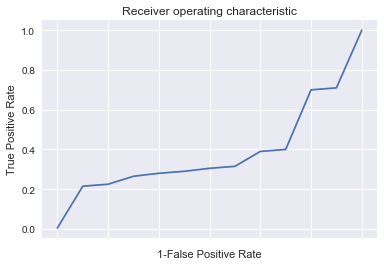

In [151]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA_LR100)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [152]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.550114


In [153]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.328378
57,gastric cancer-paclitaxel,1,0.378110
67,gastric cancer-paclitaxel,1,0.440189
89,gastric cancer-paclitaxel,1,0.414596
126,gastric cancer-paclitaxel,1,0.322246
171,gastric cancer-paclitaxel,1,0.437019


### Applying LR to Case 3 (20 features) from PCA

In [154]:
clf = LogisticRegression()
clf.fit(featPCA20, y)
predPCA_LR20 = clf.predict_proba(XTestPCA20)[:,1]
result = testData[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = predPCA_LR20
result.to_csv('PCA_with_probabilities_LR_20.csv', index = False)
result[:10]
clf.score(featPCA20, y)

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mayan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self

0.61899999999999999

In [155]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.33, 0.0)

Area under the ROC curve : nan


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:96: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):
C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

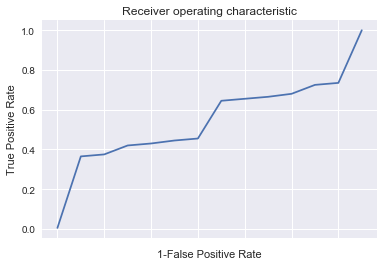

In [156]:
# Plot ROC graph
fpr, tpr, thresholds =roc_curve(yTest, predPCA_LR20)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [157]:
Disease_Drug = 'asthma-theophylline'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
85,asthma-theophylline,1,0.375298


In [158]:
Disease_Drug = 'gastric cancer-paclitaxel'
result[result['Disease-Drug'] == Disease_Drug]

,Disease-Drug,Class,Predicted_class
53,gastric cancer-paclitaxel,1,0.372590
57,gastric cancer-paclitaxel,1,0.371729
67,gastric cancer-paclitaxel,1,0.371883
89,gastric cancer-paclitaxel,1,0.371788
126,gastric cancer-paclitaxel,1,0.375269
171,gastric cancer-paclitaxel,1,0.371479


# ------------------------------------------------------------------------------------------------------
## 70:30 split

### Uncomment for 60:40 split

In [203]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### SVM Classifier

In [204]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.56
Precision: 0.266666666667
Recall: 0.0774193548387


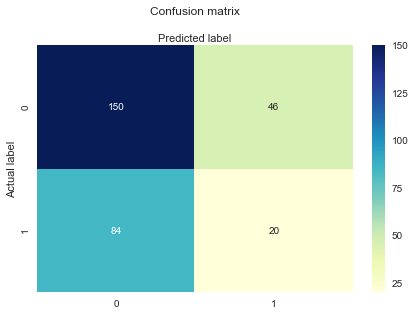

In [205]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

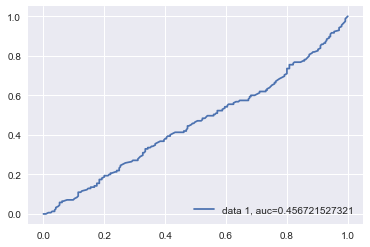

In [206]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### LR Classifier

In [207]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[186,  59],
       [130,  25]])

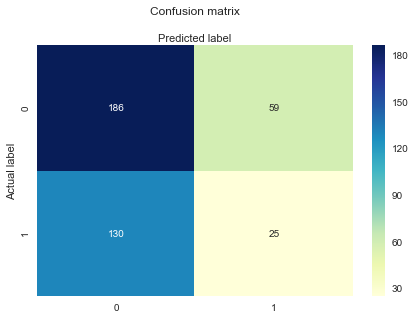

In [208]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [209]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5275
Precision: 0.297619047619
Recall: 0.161290322581


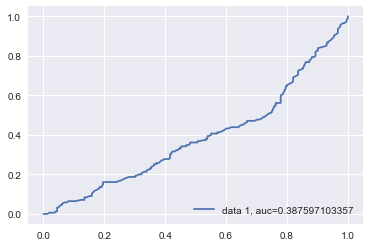

In [210]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Random Forest Classifier

In [211]:

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [212]:
#Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5025
Precision: 0.260869565217
Recall: 0.154838709677


In [213]:

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


C:\Users\mayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [214]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

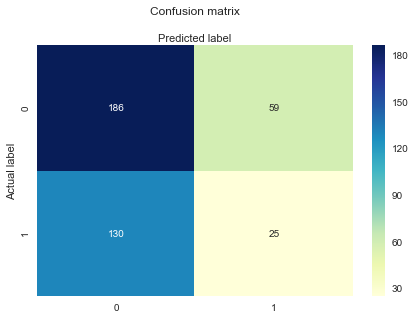

In [215]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

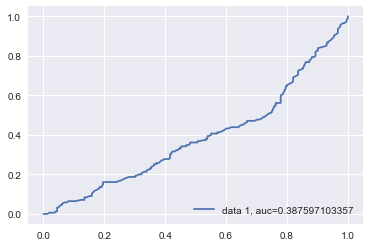

In [216]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()